In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd


In [7]:
x,y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [8]:
x

array([[-6.85154178, -3.84812752],
       [-4.4597699 , -2.39356806],
       [-4.31397693, -3.95050833],
       ...,
       [-8.10146842, -7.34614471],
       [-4.95902531, -2.88959752],
       [-5.14279983, -6.3087553 ]])

In [9]:
y

array([0, 1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 0, 2, 1, 1,
       1, 2, 2, 0, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 1, 1, 1, 0, 2, 0,
       0, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0,
       2, 2, 0, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 0, 0, 2, 2, 1,
       2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 2, 0, 2, 0,
       2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0,
       1, 1, 1, 0, 2, 2, 0, 1, 0, 0, 0, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 0,
       1, 0, 1, 1, 2, 2, 1, 2, 0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 2, 2, 0, 0,
       2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 1, 2, 1,
       2, 2, 0, 1, 2, 2, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1,
       1, 2, 1, 1, 0, 0, 2, 0, 2, 0, 2, 2, 1, 0, 1, 2, 0, 0, 1, 1, 2, 1,
       1, 2, 0, 1, 0, 1, 1, 2, 0, 2, 2, 1, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2,
       2, 2, 2, 0, 2, 0, 0, 2, 1, 2, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2,
       2, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2,

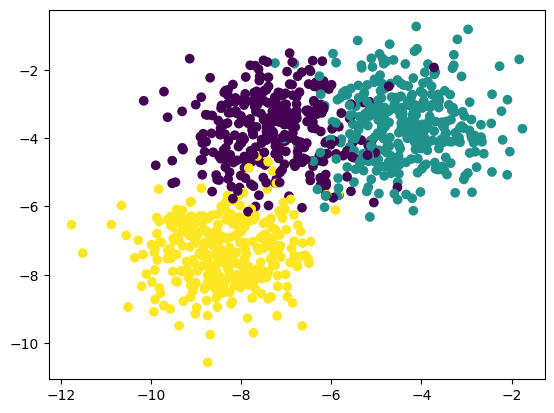

In [10]:
plt.scatter(x[:,0], x[:,1], c=y)

In [11]:
## Standardization------Feature Scaling technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [14]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [20]:
from sklearn.cluster import KMeans


In [21]:
## Elbow Method
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x_train_scaled)
    wcss.append(kmeans.inertia_)

In [22]:
wcss

[1339.9999999999989,
 540.7268795516986,
 301.52520591933364,
 258.6904924636275,
 228.28582943936772,
 180.6151465466188,
 158.6812708176265,
 148.2574780550732,
 123.94058746253167,
 115.59565049898042]

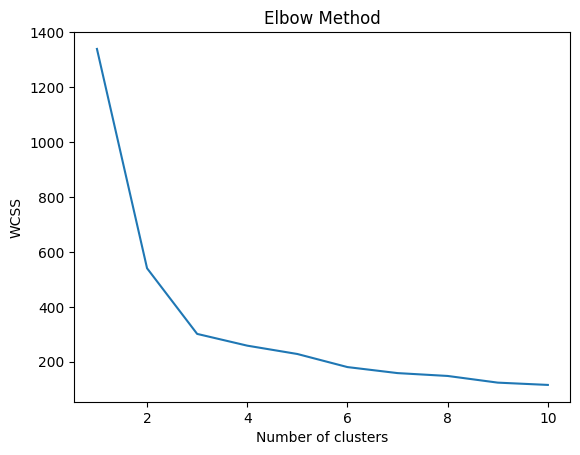

In [24]:
# plot elbow graph
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()      

In [25]:
kmeans = KMeans(n_clusters=3, init='k-means++')


In [27]:
kmeans.fit_predict(x_train_scaled)

array([1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 0,
       2, 1, 0, 2, 0, 0, 2, 0, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 1, 2, 0,
       0, 0, 0, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 2, 2, 1,
       2, 2, 2, 1, 0, 2, 2, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 2, 0, 2, 2,
       1, 2, 2, 0, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 1, 0, 2, 1, 2, 2, 0, 1,
       1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 1, 2, 0,
       0, 2, 0, 2, 1, 1, 0, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 0, 0, 2, 0,
       1, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 2, 0, 0, 2, 0,
       0, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 1, 1, 1, 2,
       2, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2, 1, 1, 1, 0,
       0, 1, 0, 0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2,

In [28]:
y_pred = kmeans.predict(x_test_scaled)

In [29]:
y_pred

array([0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1, 2,
       1, 1, 0, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0,
       1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 0, 2, 0, 1, 1, 0, 2, 2,
       2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 2, 2, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 1,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 0, 2, 1, 2, 2, 0, 1, 1, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 0, 0, 0,
       1, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0,
       2, 1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 1,
       2, 0, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 1, 1, 0, 1, 2,
       1, 2, 0, 2, 2, 1, 2, 1, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2,
       1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0,
       0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1,
       2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2, 2,

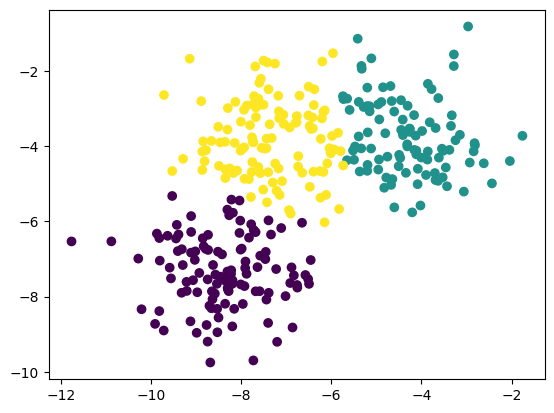

In [30]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_pred)

In [31]:
## Validating k value
## KneeLocator
## silhouette scoring


In [33]:

pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [34]:
from kneed import KneeLocator


In [36]:
kl=KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')

In [37]:
kl.elbow

np.int64(3)

In [38]:
## Silhouette Score
from sklearn.metrics import silhouette_score

In [39]:
silhouette_coefficient=[]
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x_train_scaled)
    score = silhouette_score(x_train_scaled, kmeans.labels_)
    silhouette_coefficient.append(score)
   

In [40]:
silhouette_coefficient 

[np.float64(0.5184514332631216),
 np.float64(0.4916295885124725),
 np.float64(0.4386237272500769),
 np.float64(0.35964982582040056),
 np.float64(0.3189719585158389),
 np.float64(0.32918431398149567),
 np.float64(0.32676694340023427),
 np.float64(0.329843250908306),
 np.float64(0.34325690315705043)]

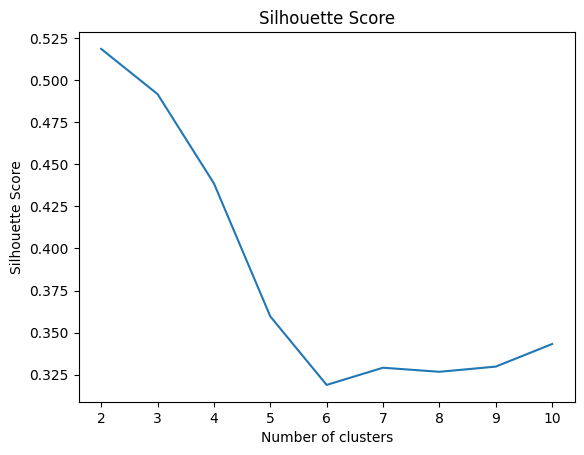

In [42]:
## Plotting Silhouette Score
plt.plot(range(2,11), silhouette_coefficient)
plt.xticks(range(2,11))
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()
